In [1]:
import pandas as pd

dataset = pd.read_csv("realtime_ddos_traffic_dataset.csv")

dataset

,traffic_type,packet_count,packet_count_per_second,byte_count,byte_count_per_second
0,Normal,4122,112,188875963,32613090
1,Normal,4280,943,697892057,13647750
2,Normal,6924,754,534906109,32374543
3,Normal,3695,1156,598962098,30985275
4,Normal,7147,373,106331004,9431993
...,...,...,...,...,...
1995,DDoS,53501,2362,1179308540,81701848
1996,DDoS,28492,2362,1613535837,78608665
1997,DDoS,50685,1590,1566803833,68806403
1998,DDoS,57783,2876,999936567,65711878


In [2]:
# Change Label For Classification

dataset['traffic_type'] = dataset['traffic_type'].apply(lambda x: 0 if x == 'Normal' else 1 if x == 'DDoS' else x)

dataset

,traffic_type,packet_count,packet_count_per_second,byte_count,byte_count_per_second
0,0,4122,112,188875963,32613090
1,0,4280,943,697892057,13647750
2,0,6924,754,534906109,32374543
3,0,3695,1156,598962098,30985275
4,0,7147,373,106331004,9431993
...,...,...,...,...,...
1995,1,53501,2362,1179308540,81701848
1996,1,28492,2362,1613535837,78608665
1997,1,50685,1590,1566803833,68806403
1998,1,57783,2876,999936567,65711878


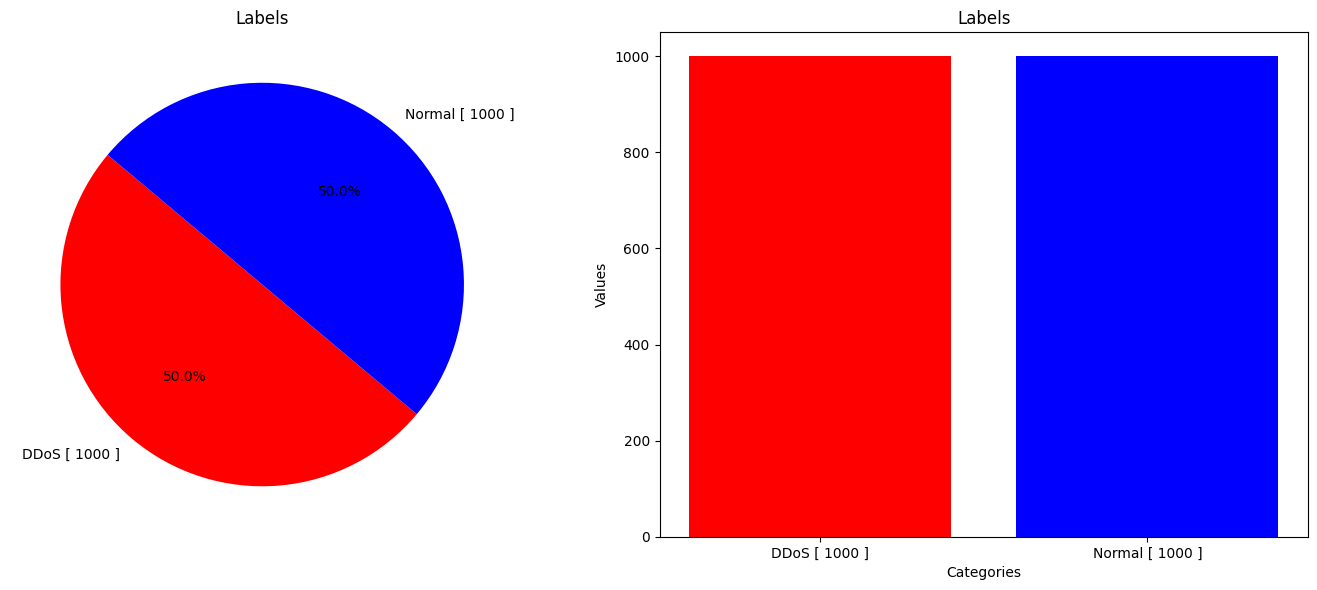

In [3]:
import matplotlib.pyplot as plt

def plot_label( c_ones , c_zeros ) :
    
    # Sample data
    categories = ['DDoS [ '+ str ( c_ones ) + ' ]', 'Normal [ '+ str( c_zeros ) +' ]']
    values = [ c_ones , c_zeros ]
    
    plt.figure(figsize=(14, 6))
    
    # Pie Chart
    plt.subplot(1, 2, 1)
    plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=['red' , 'blue' ])
    plt.title('Labels')
    
    # Bar Chart
    plt.subplot(1, 2, 2)
    plt.bar(categories, values, color=[ 'red' , 'blue' ])
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Labels')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
plot_label( list( dataset["traffic_type"] ).count(1) , list( dataset["traffic_type"] ).count(0) )

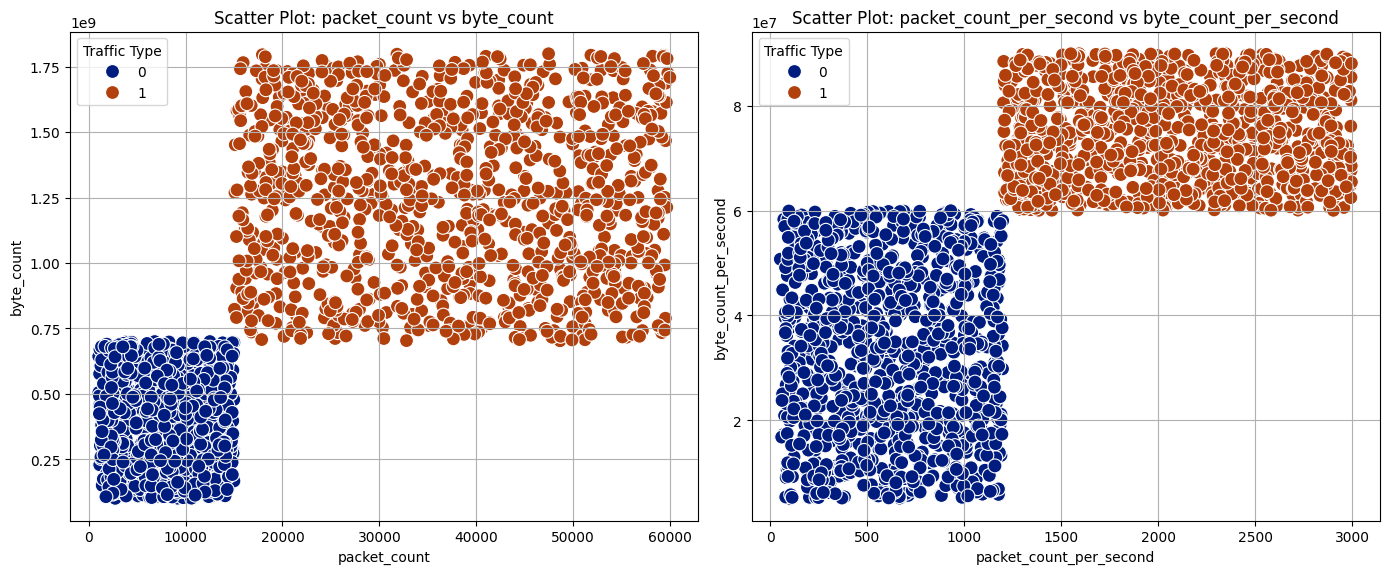

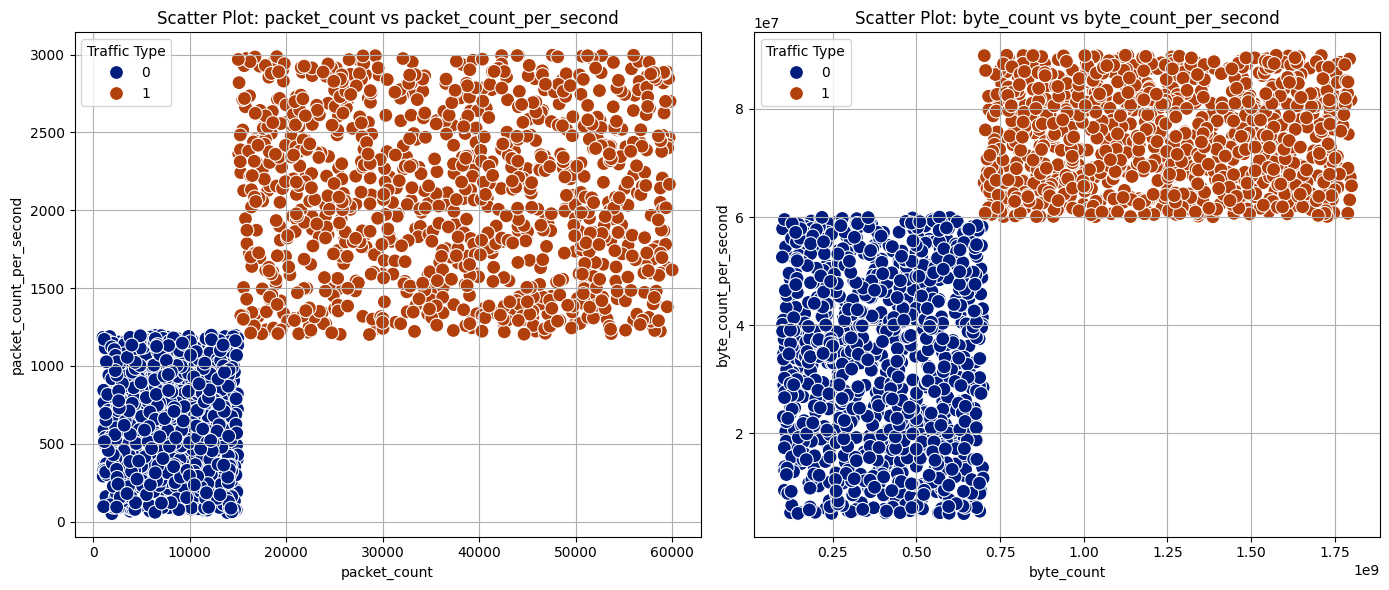

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = dataset

def plot_relation( variable1 , variable2 , variable3 , variable4 ) :
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x= variable1, 
        y= variable2, 
        hue='traffic_type', 
        data=df, 
        palette='dark', 
        s=100
    )
    plt.title(f'Scatter Plot: { variable1 } vs { variable2 }')
    plt.xlabel(variable1)
    plt.ylabel(variable2)
    plt.legend(title='Traffic Type')
    plt.grid(True)
    
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(
        x= variable3, 
        y= variable4, 
        hue='traffic_type', 
        data=df, 
        palette='dark', 
        s=100
    )
    plt.title(f'Scatter Plot: { variable3 } vs { variable4 }')
    plt.xlabel(variable3)
    plt.ylabel(variable4)
    plt.legend(title='Traffic Type')
    plt.grid(True)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

plot_relation( 'packet_count' , 'byte_count' , 'packet_count_per_second' , 'byte_count_per_second' )
plot_relation( 'packet_count' , 'packet_count_per_second' , 'byte_count' , 'byte_count_per_second' )

In [5]:

print(100*'#')
print("\nINFO : \n")
print(dataset.info())

print(100*'#')
print(f'\nIS_NULL :\n\n{ dataset.isnull().sum() }')

print(100*'#')
print(f'\nNOT_NULL :\n\n{ dataset.notnull().sum() }')

print(100*'#')
print("\n DESC : \n")
print(  dataset.describe()) 

print(100*'#')

####################################################################################################

INFO : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   traffic_type             2000 non-null   int64
 1   packet_count             2000 non-null   int64
 2   packet_count_per_second  2000 non-null   int64
 3   byte_count               2000 non-null   int64
 4   byte_count_per_second    2000 non-null   int64
dtypes: int64(5)
memory usage: 78.3 KB
None
####################################################################################################

IS_NULL :

traffic_type               0
packet_count               0
packet_count_per_second    0
byte_count                 0
byte_count_per_second      0
dtype: int64
####################################################################################################

NO

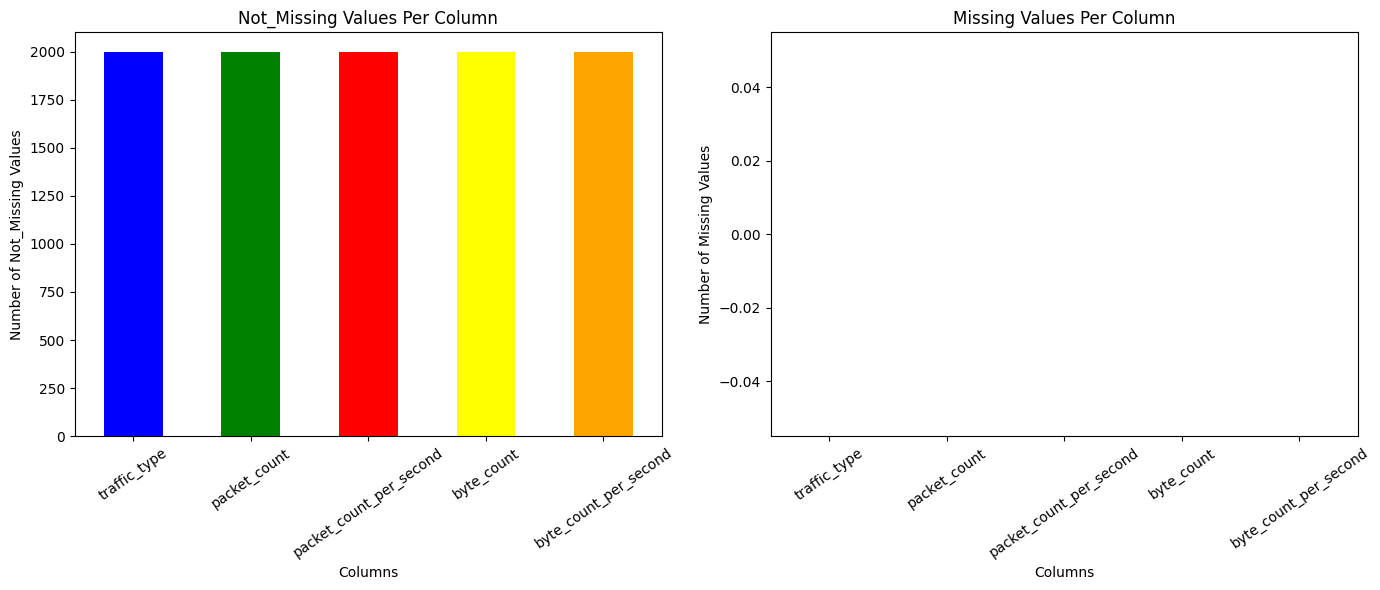

In [6]:
# Count not_missing missing and values in each column

def plot_values(  not_missing_values , missing_values ) :
    
    colors = ['blue', 'green', 'red' , 'yellow' , 'orange']

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    
    not_missing_values.plot(kind='bar' , color = colors )
    plt.title('Not_Missing Values Per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Not_Missing Values')
    plt.xticks(rotation=35)
    
    plt.subplot(1, 2, 2)
    missing_values.plot(kind='bar' , color = colors )
    plt.title('Missing Values Per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=35)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

plot_values( dataset.notnull().sum() , dataset.isnull().sum()  )

In [7]:
# data spliting for features and label
X = dataset.drop( 'traffic_type' , axis=1 )
y = pd.DataFrame( dataset["traffic_type"] )

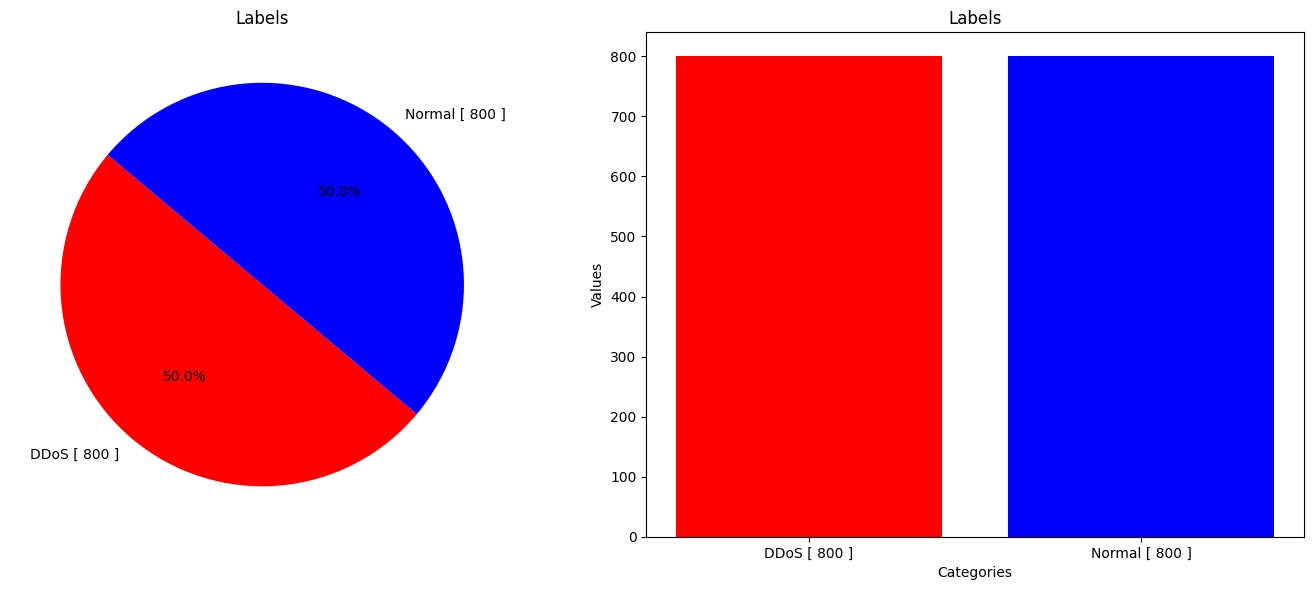

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , stratify = y , random_state=42 )

plot_label( list( y_train["traffic_type"] ).count(1) , list( y_train["traffic_type"] ).count(0) )




In [9]:
# SHAPES
print('\n',5*'#','\t','SHAPE','\t',5*'#','\n' )
print(f'Dataset ( F , L ) : { dataset.shape } ')
print(f'X       ( F )     : { X.shape }' )
print(f'y       ( L )     : { y.shape }' )
print(f'X_train ( F )     : { X_train.shape }' )
print(f'y_train ( L )     : { y_train.shape }' )
print(f'X_test  ( F )     : { X_test.shape }' )
print(f'y_test  ( L )     : { y_test.shape }' )
print("\nFeature : F , Label : L \n")


 ##### 	 SHAPE 	 ##### 

Dataset ( F , L ) : (2000, 5) 
X       ( F )     : (2000, 4)
y       ( L )     : (2000, 1)
X_train ( F )     : (1600, 4)
y_train ( L )     : (1600, 1)
X_test  ( F )     : (400, 4)
y_test  ( L )     : (400, 1)

Feature : F , Label : L 



In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

# Initialize and train KNN
model = KNeighborsClassifier(n_neighbors=300)
model.fit(X_train, y_train.values.ravel())

# Predictions and evaluation
y_pred = model.predict(X_test)

print(f'Accuracy_Score         : { accuracy_score(y_test, y_pred)*100 }')
print(f'Validation Accuracy    : { metrics.accuracy_score(y_test,model.predict(X_test))*100 }')
print(f'Classification_Report  :\n\n{ classification_report(y_test, y_pred) }')


Accuracy_Score         : 99.0
Validation Accuracy    : 99.0
Classification_Report  :

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       200
           1       1.00      0.98      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



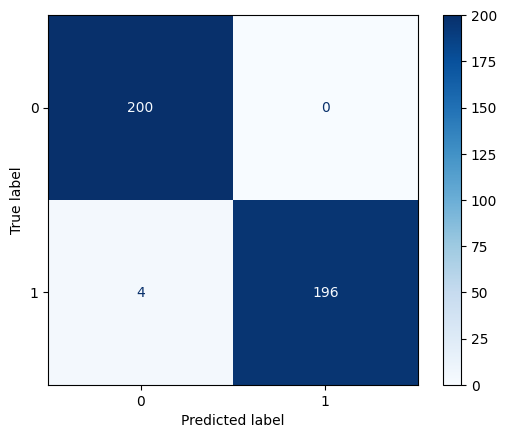

In [11]:
import matplotlib.pyplot as plt
import numpy


confusion_matrix = metrics.confusion_matrix( y_test , y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot( cmap=plt.cm.Blues )
plt.show() 

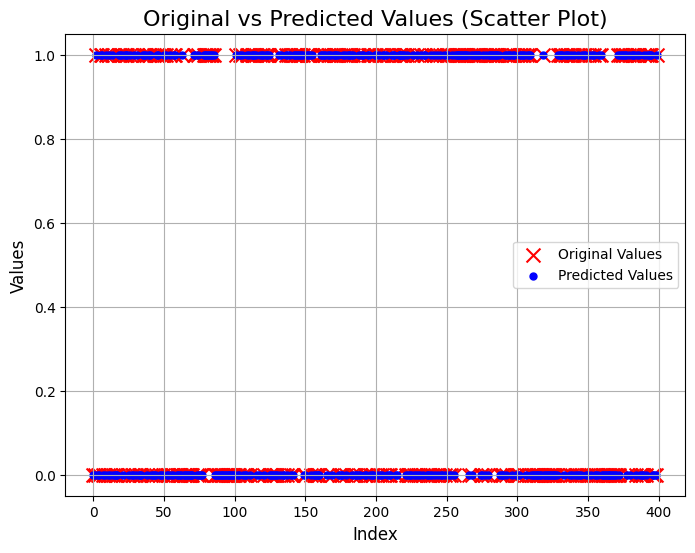

In [15]:
import matplotlib.pyplot as plt
import numpy as np


original_values = np.array(y_test)  
predicted_values = np.array(y_pred)  
# Create a scatter plot
plt.figure(figsize=(8, 6)) 
plt.scatter(range(len(original_values)), original_values, label='Original Values', color='red', marker='x', s=100)
plt.scatter(range(len(predicted_values)), predicted_values, label='Predicted Values', color='blue', marker='.', s=100)

# Add titles and labels
plt.title('Original vs Predicted Values (Scatter Plot)', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)


plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [13]:
# MODEL PREDICTION

import pandas as pd

columns = [ 'packet_count' 	, 'packet_count_per_second' , 	'byte_count' ,	'byte_count_per_second' ]  
data = [  22886, 4688377, 3439990000, 695005500 ]  


input_data = pd.DataFrame([data], columns=columns)

# Make the prediction
y_prediction = model.predict(input_data)

print(f'MODEL_PREDECTION : { y_prediction } ')

if y_prediction[0] == 0 :
    print(f"Output \t\t : NORMAL ")
else :
    print(f"Output \t\t : DDoS  ")
    

MODEL_PREDECTION : [1] 
Output 		 : DDoS  
